### Import packages:

In [1]:
# Data manipulations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests:
import scipy.stats as stats

##                                            BUSINESS PROBLEM-1

### Import dataset:

In [20]:
LoansData = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Basic Statistics - Hypothesis Testing\LoansData.csv")
LoansData

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


### EDA:

In [21]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [22]:
# checking for missing values:

LoansData.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

### Data prep:

In [23]:
# Renaming columns:

LoansData.columns = LoansData.columns.str.replace('.', '_')

C:\Users\SHUBHAM SHARMA\AppData\Local\Temp\ipykernel_11912\2823608611.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  LoansData.columns = LoansData.columns.str.replace('.', '_')


In [24]:
LoansData.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [25]:
# Data type conversion:

LoansData['Interest_Rate'] = LoansData.Interest_Rate.str.replace('%','').astype(float)
LoansData['Debt_To_Income_Ratio'] = LoansData.Debt_To_Income_Ratio.str.replace('%','').astype(float)

In [ ]:
# Impute missing values with mean for continuous variables:

continuous_vars = ['Amount_Requested','Amount_Funded_By_Investors', 'Interest_Rate','Debt_To_Income_Ratio','Monthly_Income', 
                   'Open_CREDIT_Lines','Revolving_CREDIT_Balance','Inquiries_in_the_Last_6_Months']
for var in continuous_vars:
    mean_value = LoansData[var].mean()
    LoansData[var].fillna(mean_value, inplace=True)
    
# Impute missing values with mode for categorical variables
categorical_vars = ['Home_Ownership','FICO_Range','Employment_Length']
for var in categorical_vars:
    mode_value = LoansData[var].mode()[0]
    LoansData[var].fillna(mode_value, inplace=True)

In [28]:
LoansData.info()

# final dataset to perform hypothesis testing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2500 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   FICO_Range                      2500 non-null   object 
 10  Open_CREDIT_Lines               2500 non-null   float64
 11  Revolving_CREDIT_Balance        2500 non-null   float64
 12  Inquiries_in_the_Last_6_Months  25

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

##### 1. Define Null Hypothesis, H0:
            
            There is no correlation between loan amount and interest rate.

##### 2. Define Alternate Hypothesis, Ha:
            
            Interest rate is varied for different loan amounts

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            pearsonr

In [33]:
stats.pearsonr(LoansData.Amount_Funded_By_Investors, LoansData.Interest_Rate)

PearsonRResult(statistic=0.3374266034415711, pvalue=1.2764840056932822e-67)

##### 5. Rejection Rule:
            
            From the above output, the pearson co-efficeint value = 0.3374266034415711, which shows near to intermediate                   direct relation 
            Hence, REJECT H0!!!!
            
                            OR
                            
             The new p value (1.2764840056932822e-67) from the output < assumed p value( 0.05)
             Hence, REJECT H0!!!!

##### 6. Business Conclusion:
                
             There is a near to intermediate direct relation between the interest rate and loan amounts.
        

### b. Loan length is directly effecting intrest rate.

In [35]:
LoansData.Loan_Length.value_counts()

# so we have two different loan lenghts : i) 36 months i.e. 3 years  ii ) 60 months i.e. 5 years 

36 months    1952
60 months     548
Name: Loan_Length, dtype: int64

##### 1. Define Null Hypothesis, H0:
            
            u1 = u2  
                 OR
            different loan length have same mean of interest rate  

##### 2. Define Alternate Hypothesis, Ha:
            
              u1 != u2 
                 OR
            different loan length have different mean of interest rate 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            T-test-individual

In [36]:
s1 = LoansData.loc[LoansData.Loan_Length == '36 months', 'Interest_Rate']
s2 = LoansData.loc[LoansData.Loan_Length == '60 months', 'Interest_Rate']

In [37]:
print('Mean interest rate for loan length of 36 months = ', s1.mean())
print('Mean interest rate for loan length of 60 months = ', s2.mean())

Mean interest rate for loan length of 36 months =  12.127141791301895
Mean interest rate for loan length of 60 months =  16.407463503649634


In [40]:
# perform the test:

stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.54959606433256e-110)

#### 5.Rejection Rule:

             From above output p value (9.54959606433256e-110) < 0.05
             Hence, Reject H0!!

#### 6.Business Conclusion:
                  
                  Different loan lengths have different interest rate.

### c. Inrest rate varies for different purpose of loans

In [39]:
LoansData.Loan_Purpose.value_counts()

# we have 14 different loan purposes

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

##### 1. Define Null Hypothesis, H0:
            
            
            different loan purposes have same mean of interest rate  

##### 2. Define Alternate Hypothesis, Ha:
            
              
            different loan purposes have different mean of interest rate 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            F-Test or ANOVA 

In [52]:
p1 = LoansData.loc[LoansData.Loan_Purpose == 'debt_consolidation', 'Interest_Rate']
p2 = LoansData.loc[LoansData.Loan_Purpose == 'credit_card', 'Interest_Rate']
p3 = LoansData.loc[LoansData.Loan_Purpose == 'other', 'Interest_Rate']
p4 = LoansData.loc[LoansData.Loan_Purpose == 'home_improvement', 'Interest_Rate']
p5 = LoansData.loc[LoansData.Loan_Purpose == 'major_purchase', 'Interest_Rate']
p6 = LoansData.loc[LoansData.Loan_Purpose == 'small_business', 'Interest_Rate']
p7 = LoansData.loc[LoansData.Loan_Purpose == 'car', 'Interest_Rate']
p8 = LoansData.loc[LoansData.Loan_Purpose == 'wedding', 'Interest_Rate']
p9 = LoansData.loc[LoansData.Loan_Purpose == 'medical', 'Interest_Rate']
p10 = LoansData.loc[LoansData.Loan_Purpose == 'moving', 'Interest_Rate']
p11 = LoansData.loc[LoansData.Loan_Purpose == 'vacation', 'Interest_Rate']
p12 = LoansData.loc[LoansData.Loan_Purpose == 'house', 'Interest_Rate']
p13 = LoansData.loc[LoansData.Loan_Purpose == 'educational', 'Interest_Rate']
p14 = LoansData.loc[LoansData.Loan_Purpose == 'renewable_energy', 'Interest_Rate']

In [53]:
print('Mean of interest rate for debt_consolidation purpose = ', p1.mean())
print('Mean of interest rate for credit_card purpose = ', p2.mean())
print('Mean of interest rate for other purpose = ', p3.mean())
print('Mean of interest rate for home_improvement purpose = ', p4.mean())
print('Mean of interest rate for major_purchase purpose = ', p5.mean())
print('Mean of interest rate for small_business purpose = ', p6.mean())
print('Mean of interest rate for car purpose = ', p7.mean())
print('Mean of interest rate for wedding purpose = ', p8.mean())
print('Mean of interest rate for medical purpose = ', p9.mean())
print('Mean of interest rate for moving purpose = ', p10.mean())
print('Mean of interest rate for vacation purpose = ', p11.mean())
print('Mean of interest rate for house purpose = ', p12.mean())
print('Mean of interest rate for educational purpose = ', p13.mean())
print('Mean of interest rate for renewable_energy purpose = ', p14.mean())


Mean of interest rate for debt_consolidation purpose =  13.58691660290742
Mean of interest rate for credit_card purpose =  13.05068781151047
Mean of interest rate for other purpose =  13.15955223880597
Mean of interest rate for home_improvement purpose =  11.594276315789473
Mean of interest rate for major_purchase purpose =  10.797821782178216
Mean of interest rate for small_business purpose =  12.83919540229885
Mean of interest rate for car purpose =  11.113000000000001
Mean of interest rate for wedding purpose =  12.073215084888425
Mean of interest rate for medical purpose =  11.649666666666667
Mean of interest rate for moving purpose =  13.621034482758622
Mean of interest rate for vacation purpose =  11.966190476190476
Mean of interest rate for house purpose =  13.447999999999999
Mean of interest rate for educational purpose =  11.007333333333332
Mean of interest rate for renewable_energy purpose =  9.8775


In [65]:
## Method 2 : Using UDF
## UDF to return mean for each loan purpose 

def calculate_mean_interest_rate_by_purpose(dataframe):
    purpose_mean_dict = {}
    
    # Iterate over each loan purpose
    for purpose in dataframe['Loan_Purpose'].unique():
        # Subset the data for the current purpose
        subset = dataframe[dataframe['Loan_Purpose'] == purpose]
        
        # Calculate the mean interest rate for the current purpose
        purpose_mean = subset['Interest_Rate'].mean()
        
        # Store the mean interest rate in the dictionary
        purpose_mean_dict[purpose] = purpose_mean
    
    return purpose_mean_dict

# Call the UDF to calculate the mean interest rate for each loan purpose
mean_interest_rates = calculate_mean_interest_rate_by_purpose(LoansData)

# Print the mean interest rates for each loan purpose
for purpose, mean_rate in mean_interest_rates.items():
    print(f"Loan Purpose: {purpose} | Mean Interest Rate: {mean_rate}")


Loan Purpose: debt_consolidation | Mean Interest Rate: 13.58691660290742
Loan Purpose: credit_card | Mean Interest Rate: 13.05068781151047
Loan Purpose: other | Mean Interest Rate: 13.15955223880597
Loan Purpose: moving | Mean Interest Rate: 13.621034482758622
Loan Purpose: car | Mean Interest Rate: 11.113000000000001
Loan Purpose: vacation | Mean Interest Rate: 11.966190476190476
Loan Purpose: home_improvement | Mean Interest Rate: 11.594276315789473
Loan Purpose: house | Mean Interest Rate: 13.447999999999999
Loan Purpose: major_purchase | Mean Interest Rate: 10.797821782178216
Loan Purpose: educational | Mean Interest Rate: 11.007333333333332
Loan Purpose: medical | Mean Interest Rate: 11.649666666666667
Loan Purpose: wedding | Mean Interest Rate: 12.073215084888425
Loan Purpose: small_business | Mean Interest Rate: 12.83919540229885
Loan Purpose: renewable_energy | Mean Interest Rate: 9.8775


In [54]:
stats.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14)

F_onewayResult(statistic=7.482638784097436, pvalue=1.1599665535989115e-14)

In [66]:
# Method 2 : USING for loop:
# Create an empty dictionary to store interest rates for each loan purpose
purpose_rates = {}

# Iterate over each loan purpose
for purpose in LoansData['Loan_Purpose'].unique():
    # Extract the interest rates for the current purpose
    rates = LoansData[LoansData['Loan_Purpose'] == purpose]['Interest_Rate']
    
    # Add the interest rates to the dictionary
    purpose_rates[purpose] = rates

# Perform the F-test using the interest rate values from the dictionary
stats.f_oneway(*purpose_rates.values())

F_onewayResult(statistic=7.4826387840974355, pvalue=1.1599665535989115e-14)

#### 5.Rejection Rule:

             From above output p value (pvalue=1.1599665535989115e-14) < 0.05
             Hence, Reject H0!!

#### 6.Business Conclusion:
                  
                   Inrest rate varies for different purpose of loans 
                                             OR
                   Different purposes of loans have different interest rate
                   

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [61]:
print('Unique FICO SCORES :' , LoansData.FICO_Range.nunique() )
print('unique Home Ownership :', LoansData.Home_Ownership.nunique())

Unique FICO SCORES : 38
unique Home Ownership : 5


##### 1. Define Null Hypothesis, H0:
            
            FICO scores and Home Ownership are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            FICO scores and Home Ownership are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square

In [62]:
### creating cross_tab

obs = pd.crosstab(index= LoansData.FICO_Range , columns= LoansData.Home_Ownership)
obs

Home_Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO_Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,68,0,1,13,91
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [63]:
stats.chi2_contingency(obs)

(473.564802816852,
 1.0065160858472195e-35,
 148,
 array([[2.29600e+00, 2.00000e-03, 1.00000e-02, 4.00000e-01, 2.29200e+00],
        [1.37760e+00, 1.20000e-03, 6.00000e-03, 2.40000e-01, 1.37520e+00],
        [4.59200e-01, 4.00000e-04, 2.00000e-03, 8.00000e-02, 4.58400e-01],
        [1.83680e+00, 1.60000e-03, 8.00000e-03, 3.20000e-01, 1.83360e+00],
        [5.74000e+01, 5.00000e-02, 2.50000e-01, 1.00000e+01, 5.73000e+01],
        [6.65840e+01, 5.80000e-02, 2.90000e-01, 1.16000e+01, 6.64680e+01],
        [7.94416e+01, 6.92000e-02, 3.46000e-01, 1.38400e+01, 7.93032e+01],
        [7.62272e+01, 6.64000e-02, 3.32000e-01, 1.32800e+01, 7.60944e+01],
        [7.20944e+01, 6.28000e-02, 3.14000e-01, 1.25600e+01, 7.19688e+01],
        [6.24512e+01, 5.44000e-02, 2.72000e-01, 1.08800e+01, 6.23424e+01],
        [6.42880e+01, 5.60000e-02, 2.80000e-01, 1.12000e+01, 6.41760e+01],
        [7.02576e+01, 6.12000e-02, 3.06000e-01, 1.22400e+01, 7.01352e+01],
        [6.01552e+01, 5.24000e-02, 2.62000e-01, 1.

#### 5. Rejection rule:
     
           As it is clear from above output, observed and expected frequency table values are not same, so FICO scores and Home            Ownership are dependent on each other. Hence reject H0!!
            
                                                   OR
                                                   
           New p value (1.0065160858472195e-35) < 0.05, so reject H0!!
                                       

#### 6. Business conclusion:

                FICO scores and Home Ownership are dependent on each other 
                But is is not clear that people who own home have high FICO scores

##                                            BUSINESS PROBLEM-2

In [68]:
### Import datasets:

In [67]:
price_quotes = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


##### 1. Define Null Hypothesis, H0:
            
            mean of price quote by Barry = mean of price quote by Mary
            u1 = u2 

##### 2. Define Alternate Hypothesis, Ha:
            
            mean of price quote by Barry =! mean of price quote by Mary
            u1 =! u2

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test

In [69]:
print('Mean of price quote by Barry =', price_quotes.Barry_Price.mean())
print('Mean of price quote by Mary =', price_quotes.Mary_Price.mean())

Mean of price quote by Barry = 124.33333333333333
Mean of price quote by Mary = 114.75


In [70]:
stats.ttest_rel(price_quotes.Barry_Price, price_quotes.Mary_Price)

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

#### 5.Rejection rule:
       As the new p value in above output(0.02840588045242053) < 0.05,
       we reject H0!!

#### 6.Business Conclusion:

         The average price quotes provided by Mary and Barry are different.

##                                            BUSINESS PROBLEM-3

### Import dataset:

In [71]:
Treatment_Facility = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


### Is there any effect of the reengineering effort had on the incidence behavioral problems and staff turnover

##### 1. Define Null Hypothesis, H0:
            mean employee turnover prior to reengineering = mean employee turnover post to reengineering
            u1 = u2
             
##### 2. Define Alternate Hypothesis, Ha:
            
            mean employee turnover prior to reengineering != mean employee turnover post to reengineering
            u1 != u2
            
##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test

In [73]:
prior_reengineering = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior', 'Employee_Turnover']
post_reengineering = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post', 'Employee_Turnover']

In [74]:
print('Mean of employee turnover prior to reengineering = ', prior_reengineering.mean())
print('Mean of employee turnover post to reengineering = ', post_reengineering.mean())

Mean of employee turnover prior to reengineering =  11.735692307692307
Mean of employee turnover post to reengineering =  18.68912857142857


In [75]:
stats.ttest_ind(prior_reengineering, post_reengineering)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

#### 5. Rejection reule:

       p value obtaind in above output(0.09361109345535304) > 0.05
       we  didn't reject H0!!

#### 6.Business Conclusion:
                  
                Employee turnover prior to reengineering may not be different from  employee turnover post to reengineering.
                                                                 OR
                   Reengineering efforts has no impact on employee turnover

### Determine if the reengineering effort changed the critical incidence rate

#### As per the data the last column (VAR5) represent critical incidence rate (CI %)

##### 1. Define Null Hypothesis, H0:
            mean critical incidence rate prior to reengineering = mean critical incidence rate turnover post to reengineering
            u1 = u2
             
##### 2. Define Alternate Hypothesis, Ha:
            
            mean critical incidence rate prior to reengineering != mean critical incidence rate turnover post to reengineering
            u1 != u2
            
##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test

In [76]:
prior_reengineering_CIR = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior', 'VAR5']
post_reengineering_CIR = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post', 'VAR5']

In [77]:
print('Mean of critical incidence prior to reengineering = ', prior_reengineering_CIR.mean())
print('Mean of critical incidence post to reengineering = ', post_reengineering_CIR.mean())

Mean of critical incidence prior to reengineering =  53.887906321846145
Mean of critical incidence post to reengineering =  23.34971927988571


In [78]:
stats.ttest_ind(prior_reengineering_CIR, post_reengineering_CIR)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

#### 5. Rejection reule:

       p value obtaind in above output(0.12091989189884148) > 0.05
       we didn't reject H0!!

#### 6.Business Conclusion:
                  
                   Critical incidence rate prior to reengineering may or may not same for critical incidence rate  post to                        reengineering.
                                                                 OR
                  Based on given dataset reengineering efforts has no  impact on critical incidence rate
                  
           Based on given data there were no evidence that critical rate improved prior or post to reengineering

##                                            BUSINESS PROBLEM-4

In [80]:
### Import dataset :

Priority_Assessment = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


High      326
Medium    249
Low        67
Name: Priority, dtype: int64

##### 1. Define Null Hypothesis, H0:
            
            u1 >= u2 >= u3 | u1 >= u2 <= u3 | u1 <= u2 >= u3
                 OR
       avg mean time for high priority jobs >= avg mean time for medium priority jobs >= avg mean time for low priority jobs |
       avg mean time for high priority jobs >= avg mean time for medium priority jobs <= avg mean time for low priority jobs |
       avg mean time for high priority jobs <= avg mean time for medium priority jobs >= avg mean time for low priority jobs

##### 2. Define Alternate Hypothesis, Ha:
            
              u1 < u2 < u3 
                 OR
        avg mean time for high priority jobs < avg mean time for medium priority jobs < avg mean time for low priority jobs

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            F-Test or ANOVA 

In [83]:
high_priority = Priority_Assessment.loc[Priority_Assessment.Priority == 'High', 'Days']
medium_priority = Priority_Assessment.loc[Priority_Assessment.Priority == 'Medium', 'Days']
low_priority = Priority_Assessment.loc[Priority_Assessment.Priority == 'Low', 'Days']

In [87]:
print('Mean time for project completion having high priority =', high_priority.mean(), 'days')
print('Mean time for project completion having medium priority =', medium_priority.mean(), 'days')
print('Mean time for project completion having low priority =', low_priority.mean(), 'days')

Mean time for project completion having high priority = 3.0236196319018402 days
Mean time for project completion having medium priority = 2.5 days
Mean time for project completion having low priority = 4.228358208955224 days


In [88]:
# perform the test:

stats.f_oneway(high_priority, medium_priority,low_priority)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

#### 5.Rejection Rule:

             From above output p value (0.16411459461716182) > 0.05
             Hence,we didn't reject H0!!

#### 6.Business Conclusion:
                    Based on given dataset high priority jobs, on average, should not be completed more quickly than medium                         priority jobs, and medium priority jobs should be completed more quickly than low priority jobs.
                    So, on basis of given data system is not working properly
                   

                    And also it is clear from calculation of mean that mean time compltion of medium priority job < mean                           time compltion of medium priority jobs. 
                    But if system works properly then high priority jobs will took least amount of time 

##                                            BUSINESS PROBLEM-5

### import dataset:

In [25]:
films = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Basic Statistics - Hypothesis Testing\Films.csv")
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [26]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [27]:
# missing values :
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [28]:
### UDF for value counts:

import pandas as pd

def get_value_counts(dataframe):
    value_counts = {}
    for column in dataframe.columns:
        value_counts[column] = dataframe[column].value_counts()
    return value_counts


counts = get_value_counts(films)

# Print the value counts for each column
for column, value_count in counts.items():
    print("Column:", column)
    print(value_count)
    print()


Column: _rowstate_
0    330
Name: _rowstate_, dtype: int64

Column: Movie
Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

Column: Gender
2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

Column: Marital_Status
2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

Column: Sinage
2.0    156
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

Column: Parking
2.0    153
1.0    135
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

Column: Clean
2.0    152
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

Column: Overall
2.0    160
1.0    151
3.0     12
5.0      4
4.0      1
Name: Overall, dtype: int64

Column: Age
2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

Column: Income
1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

Column: Hear_About
5  

### Data prep:

In [29]:
### replace male by 1 and female by 2 

In [30]:
films['Gender'] = films.Gender.replace({'Male': '1', 'Female': '2'})

In [31]:
films.Gender.value_counts()

2    213
1    117
Name: Gender, dtype: int64

In [32]:
### replace married by 1 and single by 2

In [33]:
films['Marital_Status'] = films.Marital_Status.replace({'Single':'2','Slngle':'2','Married':'1'})

In [34]:
films.Marital_Status.value_counts()

2    228
1    100
Name: Marital_Status, dtype: int64

In [35]:
### imputation of missing values with the mode :

In [36]:
for column in films.columns:
    
    # Check if the column has missing values
    if films[column].isnull().any():
        
        # Calculate the mode for the column
        mode_value = films[column].mode().iloc[0]
        
        # Impute missing values with the mode
        films[column] = films[column].fillna(mode_value)

In [37]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  330 non-null    object 
 4   Sinage          330 non-null    float64
 5   Parking         330 non-null    float64
 6   Clean           330 non-null    float64
 7   Overall         330 non-null    float64
 8   Age             330 non-null    float64
 9   Income          330 non-null    float64
 10  Hear_About      330 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


### this is the final data ready to go with hypothesis testing

## Hypothesis testing

###    a) What is the overall level of customer satisfaction?

In [38]:
### average overall satisfaction level = 3 (which is average/fair)

In [39]:
films.Overall.mean()

1.621212121212121

##### 1. Define Null Hypothesis, H0:
            
            u >= 3
            mean of oveall satisfaction level >= 3 

##### 2. Define Alternate Hypothesis, Ha:
            
            u < 3
            mean of oveall satisfaction level < 3

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test 

In [40]:
stats.ttest_1samp(films.Overall, 3)

Ttest_1sampResult(statistic=-36.414613050387636, pvalue=1.8889926235938803e-117)

#### 5. Rejection rule

         As the new p value in above output(1.8889926235938803e-117) < 0.05,
         we reject H0!!

####  6.Businss conclusion:

           mean of oveall satisfaction level < 3, which means:
        on an average overall satisfaction level is above average/fair 

### b) What factors are linked to satisfaction?

### i) sinage and overall satisfaction

##### 1. Define Null Hypothesis, H0:
            
            Sinage and overall satisfaction are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Sinage and overall satisfaction are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [44]:
### creating cross_tab

summ1 = pd.crosstab(index= films.Sinage, columns= films.Overall)
summ1

Overall,1.0,2.0,3.0,4.0,5.0
Sinage,,,,,
1.0,90,22,0,0,1
2.0,44,109,4,0,1
3.0,13,25,8,1,1
4.0,2,4,0,0,0
5.0,2,2,0,0,1


In [45]:
stats.chi2_contingency(summ1)

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

#### 5. Rejection rule:
     
           As it is clear from above output, observed and expected frequency table values are not same, so Sinage and overall    satisfaction are dependent on each other. Hence reject H0!!
            
                                                   OR
                                                   
           New p value (4.53298970003405e-19) < 0.05, so reject H0!!
                                       

#### 6. Business conclusion:

                Sinage and overall satisfaction are dependent on each other 

### ii) parking and overall satisfaction

##### 1. Define Null Hypothesis, H0:
            
            Parking and overall satisfaction are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Parking and overall satisfaction are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [46]:
### creating cross_tab

summ2 = pd.crosstab(index= films.Parking, columns= films.Overall)
summ2

Overall,1.0,2.0,3.0,4.0,5.0
Parking,,,,,
1.0,105,27,2,0,1
2.0,40,111,3,0,1
3.0,4,20,5,0,0
4.0,2,3,1,0,1
5.0,0,1,1,1,1


In [47]:
stats.chi2_contingency(summ2)

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

#### 5. Rejection rule:
     
           As it is clear from above output, observed and expected frequency table values are not same, so Parking and overall  satisfaction are dependent on each other. Hence reject H0!!
            
                                                   OR
                                                   
           New p value (4.783162283608494e-40) < 0.05, so reject H0!!
                                       

#### 6. Business conclusion:

                Parking and overall satisfaction are dependent on each other 

### iii) clean and overall satisfaction

##### 1. Define Null Hypothesis, H0:
            
            Clean and overall satisfaction are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Clean and overall satisfaction are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [48]:
### creating cross_tab

summ3 = pd.crosstab(index= films.Clean, columns= films.Overall)
summ3

Overall,1.0,2.0,3.0,4.0,5.0
Clean,,,,,
1.0,104,35,3,0,2
2.0,39,109,5,1,1
3.0,6,14,4,0,0
4.0,1,4,0,0,0
5.0,1,0,0,0,1


In [49]:
stats.chi2_contingency(summ3)

(127.71945555999517,
 1.7772535915434028e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

#### 5. Rejection rule:
     
           As it is clear from above output, observed and expected frequency table values are not same, so Cleanliness and overall satisfaction are dependent on each other. Hence reject H0!!
            
                                                   OR
                                                   
           New p value (1.7772535915434028e-19) < 0.05, so reject H0!!
                                       

#### 6. Business conclusion:

                Cleanliness and overall satisfaction are dependent on each other 

## All the factors (sinage, parking, cleaniliness) are linked to overall satisfaction.

## c) What is the demographic profile of Film on the Rocks patrons?

## for movie = 'Willy Wonka'

In [54]:
Willy_Wonka = films[films.Movie == 'Willy Wonka']
Willy_Wonka.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
137,0,Willy Wonka,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
138,0,Willy Wonka,2,1,2.0,2.0,2.0,2.0,3.0,3.0,5
139,0,Willy Wonka,1,2,2.0,2.0,2.0,1.0,2.0,1.0,5
140,0,Willy Wonka,1,2,3.0,1.0,1.0,1.0,2.0,2.0,5
141,0,Willy Wonka,1,2,3.0,1.0,1.0,1.0,2.0,2.0,5


### a) Gender & Marital_Status:

##### 1. Define Null Hypothesis, H0:
            
            Gender and Marital_Status are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Gender and Marital_Status are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [58]:
### creating cross_tab

summ4 = pd.crosstab(index= Willy_Wonka.Gender, columns= Willy_Wonka.Marital_Status)
summ4

# most of the males and females are single

Marital_Status,1,2
Gender,,
1,17,36
2,31,77


In [59]:
stats.chi2_contingency(summ4)

(0.06563139192686564,
 0.7978070295107771,
 1,
 array([[15.80124224, 37.19875776],
        [32.19875776, 75.80124224]]))

#### 5. Rejection rule:
                                                   
           New p value (0.7978070295107771) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Gender & Marital Status are not dependent on each other 

### b) Gender & Age:

##### 1. Define Null Hypothesis, H0:
            
            Gender and Age are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Gender and Age are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [61]:
### creating cross_tab

summ5 = pd.crosstab(index= Willy_Wonka.Gender, columns= Willy_Wonka.Age)
summ5
## from this it is clear maximum male and female are from age goup 2 : from 13-30, then 3 :  from 31-60, then 1 : from 1-12, 
## and least from 4 : above 60.

Age,1.0,2.0,3.0,4.0
Gender,,,,
1,2,32,19,0
2,10,55,40,3


In [62]:
stats.chi2_contingency(summ5)

(3.509059336124498,
 0.31958905468909815,
 3,
 array([[ 3.95031056, 28.63975155, 19.42236025,  0.98757764],
        [ 8.04968944, 58.36024845, 39.57763975,  2.01242236]]))

#### 5. Rejection rule:
                                                   
           New p value (0.31958905468909815) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Gender & Age are not dependent on each other 

### c) Gender & Income:

##### 1. Define Null Hypothesis, H0:
            
            Gender and Income are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Gender and Income are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [64]:
### creating cross_tab

summ6 = pd.crosstab(index= Willy_Wonka.Gender, columns= Willy_Wonka.Income)
summ6

# most of male & female came under income 1 : Less than $50,000

Income,1.0,2.0,3.0
Gender,,,
1,26,11,16
2,57,25,26


In [65]:
stats.chi2_contingency(summ6)

(0.6961289719792286,
 0.7060533441976904,
 2,
 array([[27.32298137, 11.85093168, 13.82608696],
        [55.67701863, 24.14906832, 28.17391304]]))

#### 5. Rejection rule:
                                                   
           New p value (0.7060533441976904) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Gender & Income are not dependent on each other 

### d) Gender & Hear_About:

##### 1. Define Null Hypothesis, H0:
            
            Gender and Hear_About are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Gender and Hear_About are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [66]:
### creating cross_tab

summ7 = pd.crosstab(index= Willy_Wonka.Gender, columns= Willy_Wonka.Hear_About)
summ7

# most of males and females hear about this movie from word of mouth (5)

Hear_About,1,2,"2,5",3,"3,4","3,5",4,5,"5,4"
Gender,,,,,,,,,
1,4,1,1,2,0,1,6,38,0
2,4,3,0,7,1,0,17,75,1


In [67]:
stats.chi2_contingency(summ7)

(7.205793139617418,
 0.5146008271343484,
 8,
 array([[ 2.63354037,  1.31677019,  0.32919255,  2.96273292,  0.32919255,
          0.32919255,  7.57142857, 37.19875776,  0.32919255],
        [ 5.36645963,  2.68322981,  0.67080745,  6.03726708,  0.67080745,
          0.67080745, 15.42857143, 75.80124224,  0.67080745]]))

#### 5. Rejection rule:
                                                   
           New p value (0.5146008271343484) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Gender & Hear About are not dependent on each other 

### e) Marital status and age:

##### 1. Define Null Hypothesis, H0:
            
            Marital Status and Age are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Marital Status and Age are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [69]:
### creating cross_tab

summ8 = pd.crosstab(index= Willy_Wonka.Marital_Status, columns= Willy_Wonka.Age)
summ8

# most of married people are from age group 3 : 31-60 and most of single people are from age group 2 : 13-30

Age,1.0,2.0,3.0,4.0
Marital_Status,,,,
1,1,7,38,2
2,11,80,21,1


In [70]:
stats.chi2_contingency(summ8)

(58.03504647863871,
 1.5450190950837418e-12,
 3,
 array([[ 3.57763975, 25.9378882 , 17.59006211,  0.89440994],
        [ 8.42236025, 61.0621118 , 41.40993789,  2.10559006]]))

#### 5. Rejection rule:
                                                   
           New p value (1.5450190950837418e-12) < 0.05, so reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Age and Marital Status are dependent on each other 

### f) Marital status and income:

##### 1. Define Null Hypothesis, H0:
            
            Marital Status and Income are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Marital Status and Income are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [72]:
### creating cross_tab

summ9 = pd.crosstab(index= Willy_Wonka.Marital_Status, columns= Willy_Wonka.Income)
summ9

# most of single are very less income  i.e. Less than $50,000, married couple have high income

Income,1.0,2.0,3.0
Marital_Status,,,
1,7,14,27
2,76,22,15


In [73]:
stats.chi2_contingency(summ9)

(43.39946598093456,
 3.766393602358313e-10,
 2,
 array([[24.74534161, 10.73291925, 12.52173913],
        [58.25465839, 25.26708075, 29.47826087]]))

#### 5. Rejection rule:
                                                   
           New p value (3.766393602358313e-10) < 0.05, so reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Income and Marital Status are dependent on each other 

### g) Marital status and hear about:

##### 1. Define Null Hypothesis, H0:
            
            Marital Status and Hear About are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Marital Status and Hear About are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [75]:
### creating cross_tab

summ10 = pd.crosstab(index= Willy_Wonka.Marital_Status, columns= Willy_Wonka.Hear_About)
summ10

# most of singles and married couple hear about this movie from word of mouth (5)

Hear_About,1,2,"2,5",3,"3,4","3,5",4,5,"5,4"
Marital_Status,,,,,,,,,
1,2,2,0,5,0,1,6,32,0
2,6,2,1,4,1,0,17,81,1


In [76]:
stats.chi2_contingency(summ10)

(7.619469661042513,
 0.4714952581271302,
 8,
 array([[ 2.38509317,  1.19254658,  0.29813665,  2.68322981,  0.29813665,
          0.29813665,  6.85714286, 33.68944099,  0.29813665],
        [ 5.61490683,  2.80745342,  0.70186335,  6.31677019,  0.70186335,
          0.70186335, 16.14285714, 79.31055901,  0.70186335]]))

#### 5. Rejection rule:
                                                   
           New p value (0.4714952581271302) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Hear about and maritual status  are not dependent on each other 

### h) age and income:

##### 1. Define Null Hypothesis, H0:
            
            Age and income are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Age and income are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [77]:
### creating cross_tab

summ11 = pd.crosstab(index= Willy_Wonka.Age, columns= Willy_Wonka.Income)
summ11

Income,1.0,2.0,3.0
Age,,,
1.0,6,3,3
2.0,57,19,11
3.0,18,14,27
4.0,2,0,1


In [78]:
stats.chi2_contingency(summ11)

(24.11461996762946,
 0.0004975011404834772,
 6,
 array([[ 6.1863354 ,  2.68322981,  3.13043478],
        [44.85093168, 19.45341615, 22.69565217],
        [30.41614907, 13.19254658, 15.39130435],
        [ 1.54658385,  0.67080745,  0.7826087 ]]))

#### 5. Rejection rule:
                                                   
           New p value (0.0004975011404834772) < 0.05, so reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka, Income and age  are dependent on each other 

### i) age and hear about :

##### 1. Define Null Hypothesis, H0:
            
            Age and hear about  are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Age and hear about are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [79]:
### creating cross_tab

summ12 = pd.crosstab(index= Willy_Wonka.Age, columns= Willy_Wonka.Hear_About)
summ12

Hear_About,1,2,"2,5",3,"3,4","3,5",4,5,"5,4"
Age,,,,,,,,,
1.0,1,1,0,2,0,0,2,6,0
2.0,4,0,0,2,1,0,12,68,0
3.0,2,3,1,5,0,1,9,37,1
4.0,1,0,0,0,0,0,0,2,0


In [80]:
stats.chi2_contingency(summ12)

(24.837084061745188,
 0.4146567407262217,
 24,
 array([[5.96273292e-01, 2.98136646e-01, 7.45341615e-02, 6.70807453e-01,
         7.45341615e-02, 7.45341615e-02, 1.71428571e+00, 8.42236025e+00,
         7.45341615e-02],
        [4.32298137e+00, 2.16149068e+00, 5.40372671e-01, 4.86335404e+00,
         5.40372671e-01, 5.40372671e-01, 1.24285714e+01, 6.10621118e+01,
         5.40372671e-01],
        [2.93167702e+00, 1.46583851e+00, 3.66459627e-01, 3.29813665e+00,
         3.66459627e-01, 3.66459627e-01, 8.42857143e+00, 4.14099379e+01,
         3.66459627e-01],
        [1.49068323e-01, 7.45341615e-02, 1.86335404e-02, 1.67701863e-01,
         1.86335404e-02, 1.86335404e-02, 4.28571429e-01, 2.10559006e+00,
         1.86335404e-02]]))

#### 5. Rejection rule:
                                                   
           New p value (0.4146567407262217) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka,hear about and age are not dependent on each other 

### j) income and hear about :

##### 1. Define Null Hypothesis, H0:
            
            Income and hear about  are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Income and hear about are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [81]:
### creating cross_tab

summ13 = pd.crosstab(index= Willy_Wonka.Income, columns= Willy_Wonka.Hear_About)
summ13

Hear_About,1,2,"2,5",3,"3,4","3,5",4,5,"5,4"
Income,,,,,,,,,
1.0,6,1,0,2,0,0,11,62,1
2.0,1,2,1,1,1,0,4,26,0
3.0,1,1,0,6,0,1,8,25,0


In [82]:
stats.chi2_contingency(summ13)

(24.017484432979376,
 0.08912331258552537,
 16,
 array([[ 4.1242236 ,  2.0621118 ,  0.51552795,  4.63975155,  0.51552795,
          0.51552795, 11.85714286, 58.25465839,  0.51552795],
        [ 1.78881988,  0.89440994,  0.22360248,  2.01242236,  0.22360248,
          0.22360248,  5.14285714, 25.26708075,  0.22360248],
        [ 2.08695652,  1.04347826,  0.26086957,  2.34782609,  0.26086957,
          0.26086957,  6.        , 29.47826087,  0.26086957]]))

#### 5. Rejection rule:
                                                   
           New p value (0.08912331258552537) > 0.05, so didn't reject H0!!

#### 6. Business conclusion:

                For movie Willy Wonka,hear about and income are not dependent on each other 

### Similarly we can peroform above steps for other two movies also but the process become too lengthy.

## WE CAN ALSO SEE THESE CORRELATIONS USING HEATMAPS:

In [135]:
corr_willy_wonka = Willy_Wonka.loc[ : : , [ 'Gender', 'Marital_Status', 'Age', 'Income']]

In [137]:
corr_willy_wonka['Gender'] = corr_willy_wonka.Gender.astype('float64')
corr_willy_wonka['Marital_Status'] = corr_willy_wonka.Marital_Status.astype('float64')

In [138]:
corr_willy_wonka.dtypes

Gender            float64
Marital_Status    float64
Age               float64
Income            float64
dtype: object

In [139]:
corr_1 = corr_willy_wonka.corr()
corr_1

,Gender,Marital_Status,Age,Income
Gender,1.000000,0.034638,0.009263,-0.054794
Marital_Status,0.034638,1.000000,-0.536212,-0.518696
Age,0.009263,-0.536212,1.000000,0.271144
Income,-0.054794,-0.518696,0.271144,1.000000


## for movie 'Ferris Buellers Day Off':

In [102]:
Ferris_Buellers_Day_Off = films[films.Movie == 'Ferris Buellers Day Off']
Ferris_Buellers_Day_Off.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1


###  for movie:  'Ferris Buellers Day Off':

In [104]:
corr_Ferris_Buellers_Day_Off = Ferris_Buellers_Day_Off.loc[ : : , [ 'Gender', 'Marital_Status', 'Age', 'Income']]

In [114]:
corr_Ferris_Buellers_Day_Off['Gender'] = corr_Ferris_Buellers_Day_Off.Gender.astype('float64')

In [115]:
corr_Ferris_Buellers_Day_Off['Marital_Status'] = corr_Ferris_Buellers_Day_Off.Marital_Status.astype('float64')

In [120]:
corr_2 = corr_Ferris_Buellers_Day_Off.corr()
corr_2

,Gender,Marital_Status,Age,Income
Gender,1.000000,0.057282,-0.050510,-0.053548
Marital_Status,0.057282,1.000000,-0.559279,-0.215417
Age,-0.050510,-0.559279,1.000000,-0.015341
Income,-0.053548,-0.215417,-0.015341,1.000000


###  for movie:  'Old School':

In [122]:
old_school = films[films.Movie == 'Old School']

In [124]:
old_school.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
298,0,Old School,2,2,2.0,2.0,2.0,1.0,3.0,2.0,"3,4"
299,0,Old School,1,1,1.0,1.0,1.0,1.0,3.0,3.0,5
300,0,Old School,2,1,1.0,1.0,1.0,1.0,3.0,3.0,5
301,0,Old School,1,2,1.0,1.0,1.0,1.0,1.0,3.0,5
302,0,Old School,2,2,5.0,5.0,5.0,5.0,2.0,3.0,5


In [126]:
corr_old_school = old_school.loc[ : : , [ 'Gender', 'Marital_Status', 'Age', 'Income']]

In [127]:
corr_old_school['Gender'] = corr_old_school.Gender.astype('float64')
corr_old_school['Marital_Status'] = corr_old_school.Marital_Status.astype('float64')

In [128]:
corr_old_school.dtypes

Gender            float64
Marital_Status    float64
Age               float64
Income            float64
dtype: object

In [131]:
corr_3 = corr_old_school.corr()
corr_3

,Gender,Marital_Status,Age,Income
Gender,1.000000,-0.062797,0.142278,0.128955
Marital_Status,-0.062797,1.000000,-0.617914,-0.301783
Age,0.142278,-0.617914,1.000000,0.174912
Income,0.128955,-0.301783,0.174912,1.000000


In [132]:
### Heat maps for all three movies:

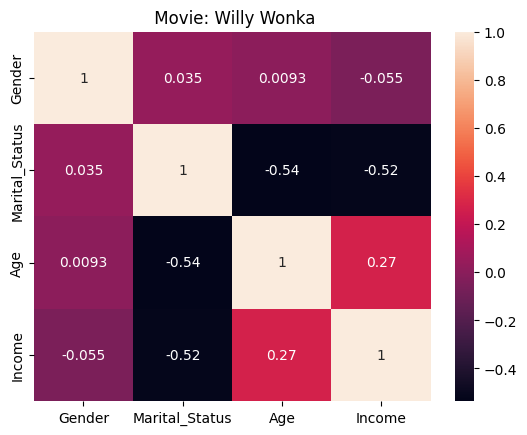

<Figure size 640x480 with 0 Axes>

In [141]:
sns.heatmap(corr_1, annot= True)
plt.title(' Movie: Willy Wonka')
plt.show()
plt.tight_layout()

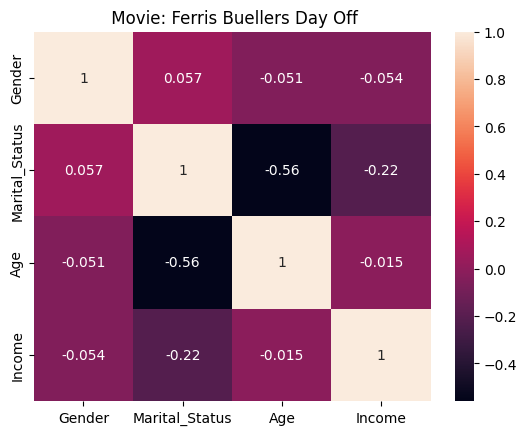

<Figure size 640x480 with 0 Axes>

In [142]:
sns.heatmap(corr_2, annot= True)
plt.title(' Movie: Ferris Buellers Day Off')
plt.show()
plt.tight_layout()

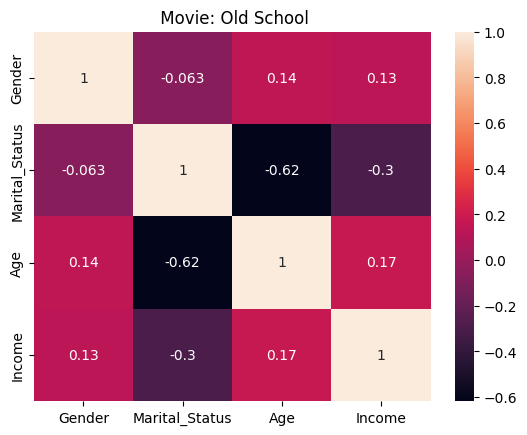

<Figure size 640x480 with 0 Axes>

In [143]:
sns.heatmap(corr_3, annot= True)
plt.title(' Movie: Old School')
plt.show()
plt.tight_layout()

### Outcomes :

###            
               1. Marital Status has indirect intermediate relation relation with age and income.
               2. Gender and hear about has no relation with any of the variable (income, age, marital_status).
               3. Age and income has weak direct relation except for movie 'Ferris Buellers Day Off'.


## d) In what media outlet(s) should the film series be advertised?

In [159]:
advertisement = pd.DataFrame(films.groupby('Hear_About').Hear_About.count())
advertisement.head()

,Hear_About
Hear_About,
1,22
"1,5",1
2,12
"2,5",2
3,14


In [163]:
advertisement = advertisement.rename(columns= {'Hear_About' : 'Frequency'})
advertisement.sort_values('Frequency', ascending= False, inplace= True)

In [165]:
advertisement['percentage'] = (advertisement.Frequency / advertisement.Frequency.sum()) * 100

In [166]:
advertisement

,Frequency,percentage
Hear_About,,
5,233,70.606061
4,41,12.424242
1,22,6.666667
3,14,4.242424
2,12,3.636364
"2,5",2,0.606061
"3,4",2,0.606061
"1,5",1,0.303030
"3,5",1,0.303030


### The patron’s response to this question: “How did you hear about Film on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth

### Around 70% of people hear about film by word of mouth but we shouldn't advertise using word of mouth. So going to secong highest option which is website.

### So, film series should be advertise through 'WEBSITE'